SMALLMAN JIMU PRESENTATION ML


PRESENTATION TOPIC

PREDICTING THE LIKELIHOOD OF STROKE OCCURENCE

1.  DATA PREPROCESSING AND X AND Y VARIABLES DEFINED

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv')

# Drop missing values
data = data.dropna()

# Encode categorical variables using LabelEncoder
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features and target
X = data.drop('stroke', axis=1)  # Adjust 'stroke' column as per your dataset
y = data['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. DEFINING HYPERARAMETERS

In [2]:
# Hyperparameters for each model
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

3. Create Pipelines for Each Model

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression Pipeline
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('logistic', LogisticRegression())
])

# SVC Pipeline
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('svc', SVC())
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('randomforestclassifier', RandomForestClassifier())
])

# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('decisiontreeclassifier', DecisionTreeClassifier())
])

4. Perform Grid Search
Now, we can perform grid search on each model using the defined hyperparameters.

In [9]:
from sklearn.model_selection import GridSearchCV

# Models with their hyperparameter grids
pipelines = {
    'Logistic Regression': (logistic_pipeline, {
        'logistic__C': [0.1, 1, 10],
        'logistic__solver': ['liblinear', 'lbfgs']
    }),
    'SVC': (svc_pipeline, {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': [0.01, 0.1, 1]
    }),
    'Random Forest': (rf_pipeline, {
        'randomforestclassifier__n_estimators': [50, 100, 200],
        'randomforestclassifier__max_depth': [None, 10, 20],
        'randomforestclassifier__min_samples_split': [2, 5],
        'randomforestclassifier__min_samples_leaf': [1, 2]
    }),
    'Decision Tree': (dt_pipeline, {
        'decisiontreeclassifier__max_depth': [None, 10, 20],
        'decisiontreeclassifier__min_samples_split': [2, 5],
        'decisiontreeclassifier__min_samples_leaf': [1, 2]
    })
}

# Perform Grid Search for each model
best_parameters = {}
for model_name, (pipeline, param_grid) in pipelines.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are already defined
    
    # Store best parameters
    best_parameters[model_name] = grid_search.best_params_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Running GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'logistic__C': 0.1, 'logistic__solver': 'liblinear'}
Running GridSearchCV for SVC...
Best parameters for SVC: {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Running GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 5}


5. EVALUATING MODELS BASED ON CREATED HYPER PARAMETERS

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [12]:
# Logistic Regression Hyperparameters
logistic_params = {
    'logistic__C': [0.1, 1, 10],
    'logistic__max_iter': [100, 200, 300]
}

# SVC Hyperparameters
svc_params = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# Random Forest Hyperparameters
rf_params = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Decision Tree Hyperparameters
dt_params = {
    'decisiontreeclassifier__max_depth': [None, 10, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}


In [13]:
# Logistic Regression Pipeline
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('logistic', LogisticRegression())
])

# SVC Pipeline
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('svc', SVC())
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('randomforestclassifier', RandomForestClassifier())
])

# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('decisiontreeclassifier', DecisionTreeClassifier())
])


5.  Perform Grid Search
Now, we can perform grid search on each model using the defined hyperparameters.

In [14]:
# Logistic Regression Grid Search
logistic_grid = GridSearchCV(estimator=logistic_pipeline, param_grid=logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

# SVC Grid Search
svc_grid = GridSearchCV(estimator=svc_pipeline, param_grid=svc_params, cv=5, scoring='accuracy')
svc_grid.fit(X_train, y_train)

# Random Forest Grid Search
rf_grid = GridSearchCV(estimator=rf_pipeline, param_grid=rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Decision Tree Grid Search
dt_grid = GridSearchCV(estimator=dt_pipeline, param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [None, 10, 20],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='accuracy')

6. Get the Best Models

In [15]:
# Best Logistic Regression Model
best_logistic = logistic_grid.best_estimator_
print("Best Logistic Regression Parameters:", logistic_grid.best_params_)

# Best SVC Model
best_svc = svc_grid.best_estimator_
print("Best SVC Parameters:", svc_grid.best_params_)

# Best Random Forest Model
best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

# Best Decision Tree Model
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Parameters:", dt_grid.best_params_)


Best Logistic Regression Parameters: {'logistic__C': 0.1, 'logistic__max_iter': 100}
Best SVC Parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best Random Forest Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Best Decision Tree Parameters: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_split': 10}


6B. RESULTS OF THE BEST HYPERPARAMETER AND MODEL WHICH PERFOMED WELL BASED ON THE RESULTS

Evaluating Logistic Regression...
Confusion Matrix for Logistic Regression:
[[929   0]
 [ 53   0]]


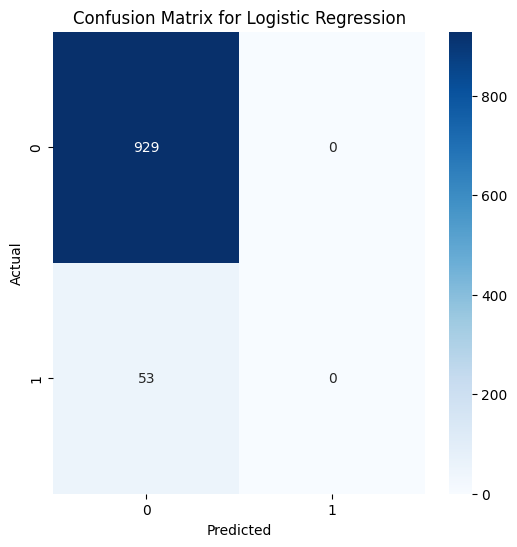

Accuracy for Logistic Regression: 0.9460
F1 Score for Logistic Regression: 0.9198
Recall for Logistic Regression: 0.9460
Precision for Logistic Regression: 0.8950
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

Evaluating SVC...
Confusion Matrix for SVC:
[[929   0]
 [ 53   0]]


C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

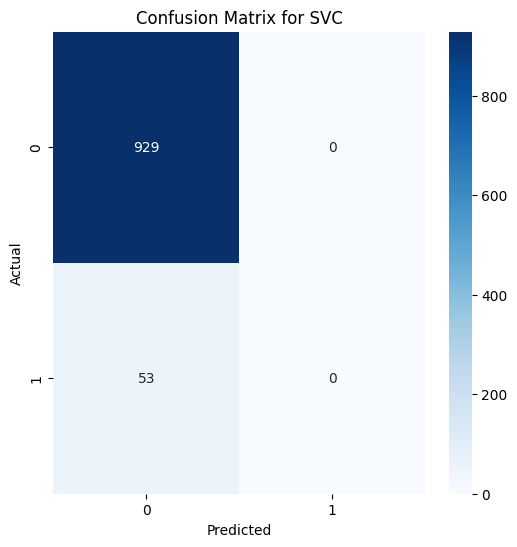

C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Accuracy for SVC: 0.9460
F1 Score for SVC: 0.9198
Recall for SVC: 0.9460
Precision for SVC: 0.8950
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

Evaluating Random Forest...
Confusion Matrix for Random Forest:
[[929   0]
 [ 53   0]]


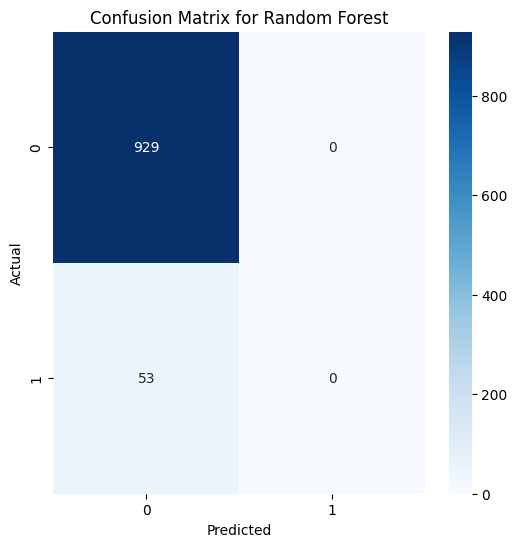

C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Accuracy for Random Forest: 0.9460
F1 Score for Random Forest: 0.9198
Recall for Random Forest: 0.9460
Precision for Random Forest: 0.8950
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

Evaluating Decision Tree...
Confusion Matrix for Decision Tree:
[[921   8]
 [ 52   1]]


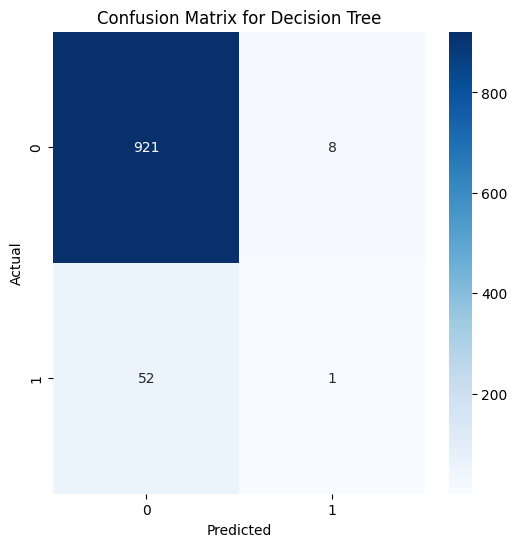

Accuracy for Decision Tree: 0.9389
F1 Score for Decision Tree: 0.9179
Recall for Decision Tree: 0.9389
Precision for Decision Tree: 0.9015
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.11      0.02      0.03        53

    accuracy                           0.94       982
   macro avg       0.53      0.51      0.50       982
weighted avg       0.90      0.94      0.92       982


Model Comparison:
Logistic Regression:
  Accuracy: 0.9460
  F1 Score: 0.9198
  Recall: 0.9460
  Precision: 0.8950
SVC:
  Accuracy: 0.9460
  F1 Score: 0.9198
  Recall: 0.9460
  Precision: 0.8950
Random Forest:
  Accuracy: 0.9460
  F1 Score: 0.9198
  Recall: 0.9460
  Precision: 0.8950
Decision Tree:
  Accuracy: 0.9389
  F1 Score: 0.9179
  Recall: 0.9389
  Precision: 0.9015

The best model overall is: Logistic Regression


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate each model
models = {
    'Logistic Regression': best_logistic,
    'SVC': best_svc,
    'Random Forest': best_rf,
    'Decision Tree': best_dt
}

results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    plot_confusion_matrix(cm, model_name)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    classification_rep = classification_report(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"F1 Score for {model_name}: {f1:.4f}")
    print(f"Recall for {model_name}: {recall:.4f}")
    print(f"Precision for {model_name}: {precision:.4f}")
    print(f"Classification Report for {model_name}:\n{classification_rep}")
    
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision
    }

# Compare Models
print("\nModel Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")

# Determine the best model
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])  # You can base this on another metric if desired
print(f"\nThe best model overall is: {best_model_name}")

7.LOADING THE ACTUAL DATASET

In [43]:
import pandas as pd

# Load the dataset
#                 
df = pd.read_csv('C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv')

# Inspect the first few rows
print(df.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


8.DEFINING PARAMETERS AND PREPROCCESING ON  OUR ACTUAL DATASET OF STROKE OCCURENCE

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the stroke dataset
data = pd.read_csv('C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv')

# Preprocessing: Handle missing values and categorical encoding
data = data.dropna()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)  # One-hot encode categorical variables

# Split into features and target variable
X = data.drop('stroke', axis=1)  # Adjust 'stroke' column as per your dataset
y = data['stroke']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('sampler', SMOTE(random_state=42)),  # Oversample minority class using SMOTE
    ('classifier', LogisticRegression(random_state=42))  # Logistic Regression classifier
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1401
           1       0.14      0.83      0.23        72

    accuracy                           0.73      1473
   macro avg       0.56      0.78      0.53      1473
weighted avg       0.95      0.73      0.81      1473



9. APPLYING SMOTE FOR BALANCING THE DATASET

In [48]:
import pandas as pd
from collections import Counter

# Check class distribution in the training set
print("Class distribution in y_train after SMOTE:")
print(Counter(y_train))

Class distribution in y_train after SMOTE:
Counter({0: 3299, 1: 137})


10. COMPREHENSIVE EDA FOR All VARIABLES

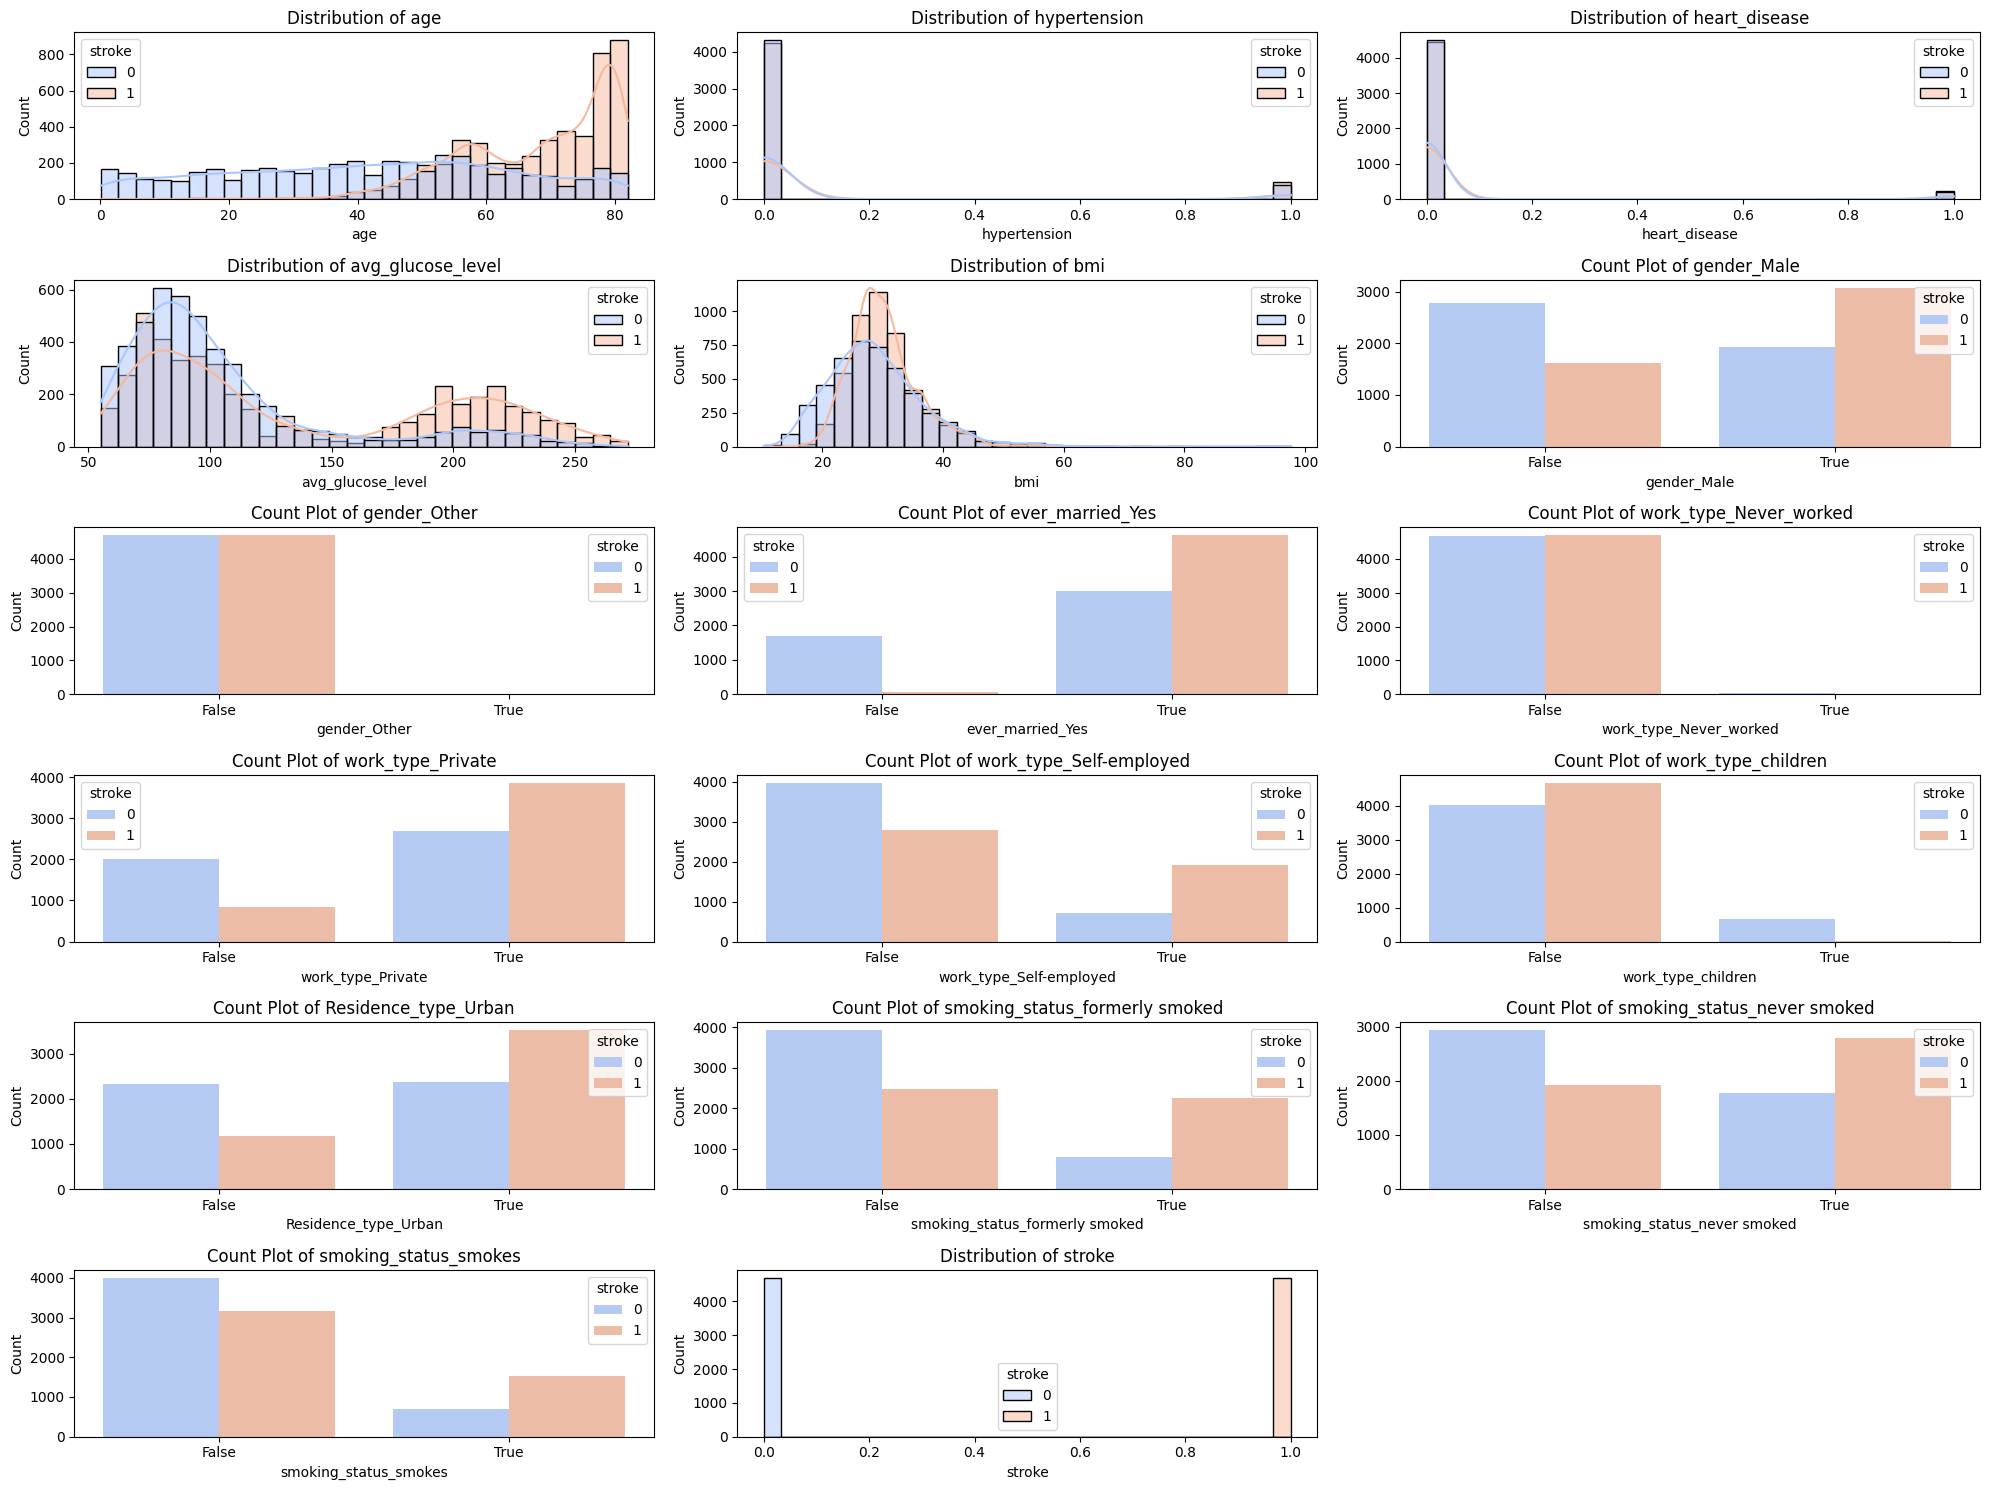

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Drop irrelevant columns and handle missing values
data = data.drop(columns=['id'])  # Remove 'id' column as it is non-predictive
data = data.dropna()  # Drop rows with missing values

# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=['stroke'])  # Predictor variables
y = data['stroke']  # Target variable

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Combine balanced data for visualization
balanced_data = pd.DataFrame(X_balanced, columns=X.columns)
balanced_data['stroke'] = y_balanced

# List all variables for EDA
all_features = balanced_data.columns

# Plot distributions for all variables
plt.figure(figsize=(20, 15))
for i, feature in enumerate(all_features):
    plt.subplot(len(all_features) // 3 + 1, 3, i + 1)
    if balanced_data[feature].dtype in ['float64', 'int64']:  # Numerical features
        sns.histplot(data=balanced_data, x=feature, hue='stroke', kde=True, bins=30, palette='coolwarm')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Count')
    else:  # Categorical features
        sns.countplot(data=balanced_data, x=feature, hue='stroke', palette='coolwarm')
        plt.title(f'Count Plot of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Count')
plt.tight_layout()
plt.show()

11. TRAIN AND TEST SPLIT

In [82]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80 , random_state=42, stratify=y)

12. APPLYING ONE HOT ENCODING ON THE CATEGORICAL DATASET

In [58]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

# Smallman says we should do this:
preprocessing = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)), remainder='passthrough')
trans_data = preprocessing.fit_transform(X_train)
pd.DataFrame(trans_data, columns=preprocessing.get_feature_names_out(), index=X_train.index)

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__gender_Other,onehotencoder__ever_married_No,onehotencoder__ever_married_Yes,onehotencoder__work_type_Govt_job,onehotencoder__work_type_Never_worked,onehotencoder__work_type_Private,onehotencoder__work_type_Self-employed,onehotencoder__work_type_children,...,onehotencoder__smoking_status_Unknown,onehotencoder__smoking_status_formerly smoked,onehotencoder__smoking_status_never smoked,onehotencoder__smoking_status_smokes,remainder__id,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi
1473,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,66893.0,49.00,1.0,0.0,139.43,40.2
4539,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,37289.0,63.00,0.0,0.0,203.87,26.4
953,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,13622.0,6.00,0.0,0.0,92.98,18.9
2563,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,65481.0,57.00,0.0,0.0,90.40,26.5
2426,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,41244.0,7.00,0.0,0.0,79.58,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,41536.0,33.00,0.0,0.0,57.92,22.3
757,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,6886.0,19.00,0.0,0.0,84.31,31.8
5024,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,70718.0,33.00,0.0,0.0,153.34,31.5
1853,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,70857.0,55.00,0.0,0.0,198.36,29.1


13. MAKING A PIPELINE 

In [66]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))  # Added Decision Tree
    ]
)

voting_pipeline = make_pipeline((preprocessing), (voting_clf))
voting_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=42)),
                                              ('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('svc', SVC(random_state=42)),
                                              ('dt',
                                               DecisionTreeClassifier(random_state=42))]))])

14. RESULTS AND THE CONFUSION MATRICES

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Example dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Pipeline and Grid Search
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])
logistic_params = {
    'logistic__C': [0.01, 0.1, 1, 10],
    'logistic__solver': ['liblinear', 'lbfgs']
}
logistic_grid = GridSearchCV(logistic_pipeline, param_grid=logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)
best_logistic = logistic_grid.best_estimator_

# SVC Pipeline and Grid Search
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])
svc_params = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}
svc_grid = GridSearchCV(svc_pipeline, param_grid=svc_params, cv=5, scoring='accuracy')
svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_

# Random Forest Grid Search
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Decision Tree Grid Search
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Evaluate models and print classification reports
logistic_preds = best_logistic.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_preds))

svc_preds = best_svc.predict(X_test)
print("SVC Classification Report:\n", classification_report(y_test, svc_preds))

rf_preds = best_rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

dt_preds = best_dt.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        93
           1       0.93      0.78      0.85       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        93
           1       0.94      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        93
           1       0.95      0.84      0.89       107

    accuracy                           0.89       200
   macro avg      

15. CONFUSION MATRICES ONLY

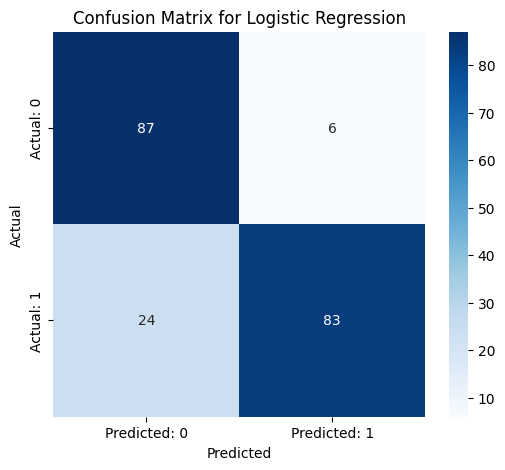

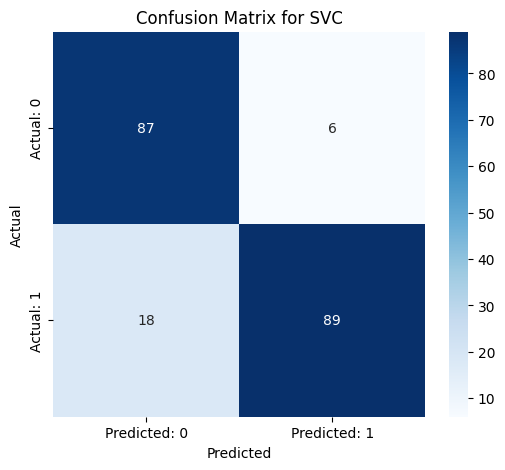

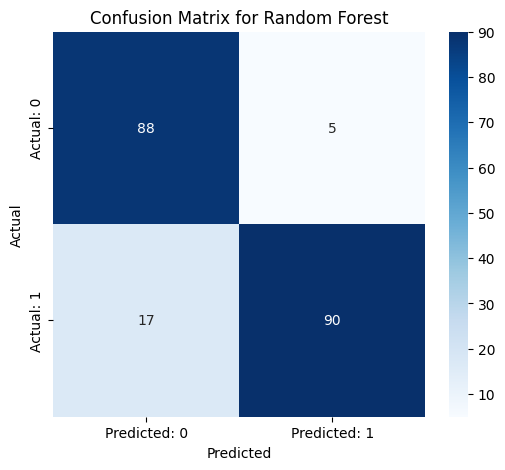

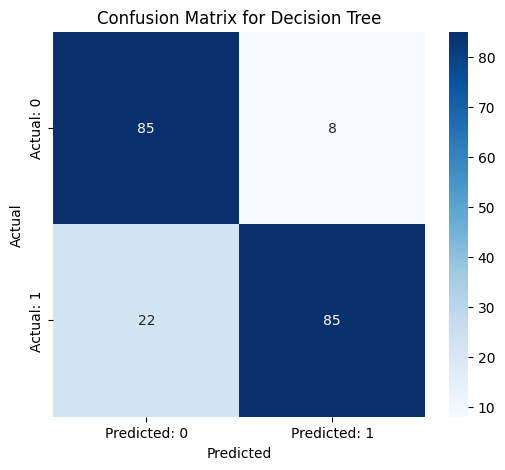

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define confusion matrices
confusion_matrices = {
    "Logistic Regression": [[87, 6], [24, 83]],
    "SVC": [[87, 6], [18, 89]],
    "Random Forest": [[88, 5], [17, 90]],
    "Decision Tree": [[85, 8], [22, 85]]  # Added Decision Tree confusion matrix
}

# Plot confusion matrices
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

16. THE CORRELATION MATRIX 

Filtered Correlation Matrix After SMOTE:
                                      id       age  hypertension  \
id                              1.000000 -0.006923     -0.038217   
age                            -0.006923  1.000000      0.154991   
hypertension                   -0.038217  0.154991      1.000000   
heart_disease                   0.023849  0.154550      0.073272   
avg_glucose_level               0.015976  0.319085      0.144554   
bmi                             0.021770  0.230842      0.111846   
gender_Male                     0.011943  0.140836      0.027779   
gender_Other                    0.009122 -0.013688     -0.003178   
ever_married_Yes                0.012319  0.703174      0.082406   
work_type_Never_worked          0.002386 -0.086288     -0.014923   
work_type_Private               0.037548  0.235643     -0.013278   
work_type_Self-employed        -0.090133  0.354499      0.059396   
work_type_children             -0.005158 -0.605699     -0.088271   
Residen

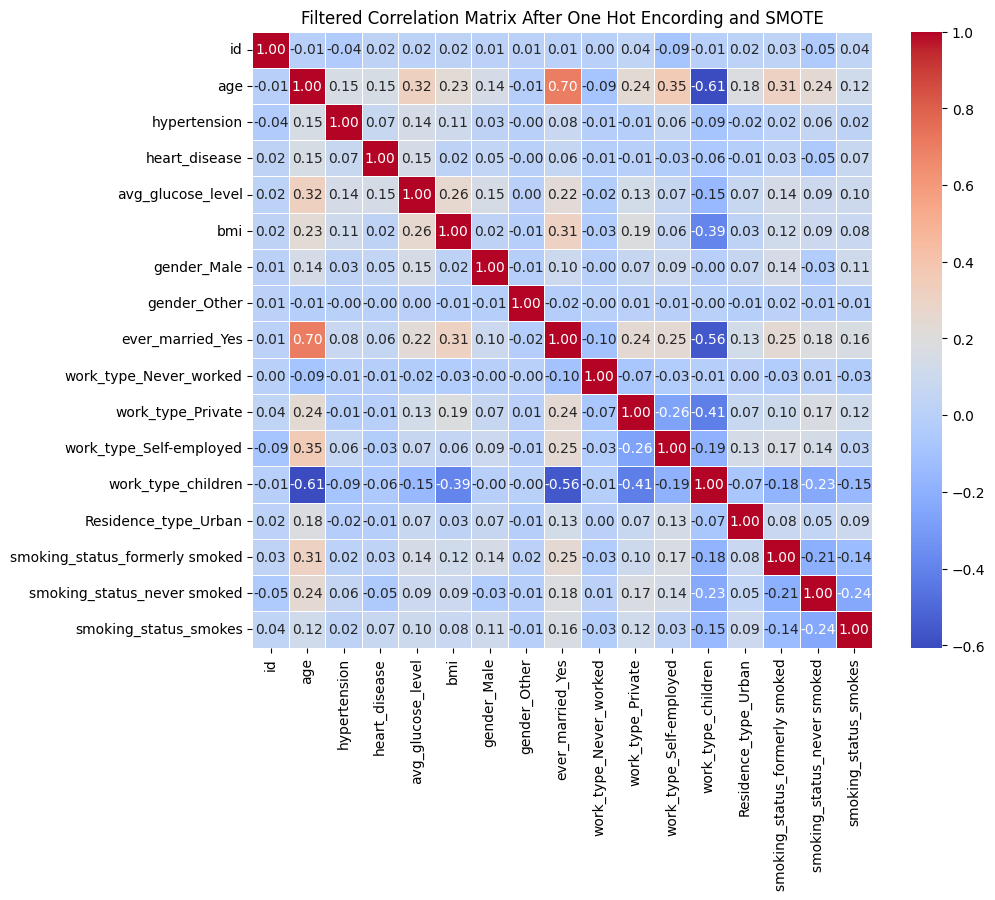

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the stroke dataset
data = pd.read_csv('C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv')

# Preprocessing: Handle missing values and encode categorical variables
data = data.dropna()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)  # Apply one-hot encoding

# Separate features and target variable
X = data.drop('stroke', axis=1)  # Feature variables
y = data['stroke']  # Target variable

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Compute correlation matrix for the SMOTE-balanced dataset
correlation_matrix = X_smote.corr()

# Filter relevant correlated variables (absolute correlation > threshold)
threshold = 0.3  # Define the correlation threshold
filtered_corr = correlation_matrix[(correlation_matrix.abs() > threshold).any(axis=1)]
filtered_corr = filtered_corr.loc[:, (filtered_corr.abs() > threshold).any(axis=0)]

# Display the filtered correlation matrix
print("Filtered Correlation Matrix After SMOTE:")
print(filtered_corr)

# Plot the filtered correlation matrix for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Filtered Correlation Matrix After One Hot Encording and SMOTE')
plt.show()

17. Feature importance on training data

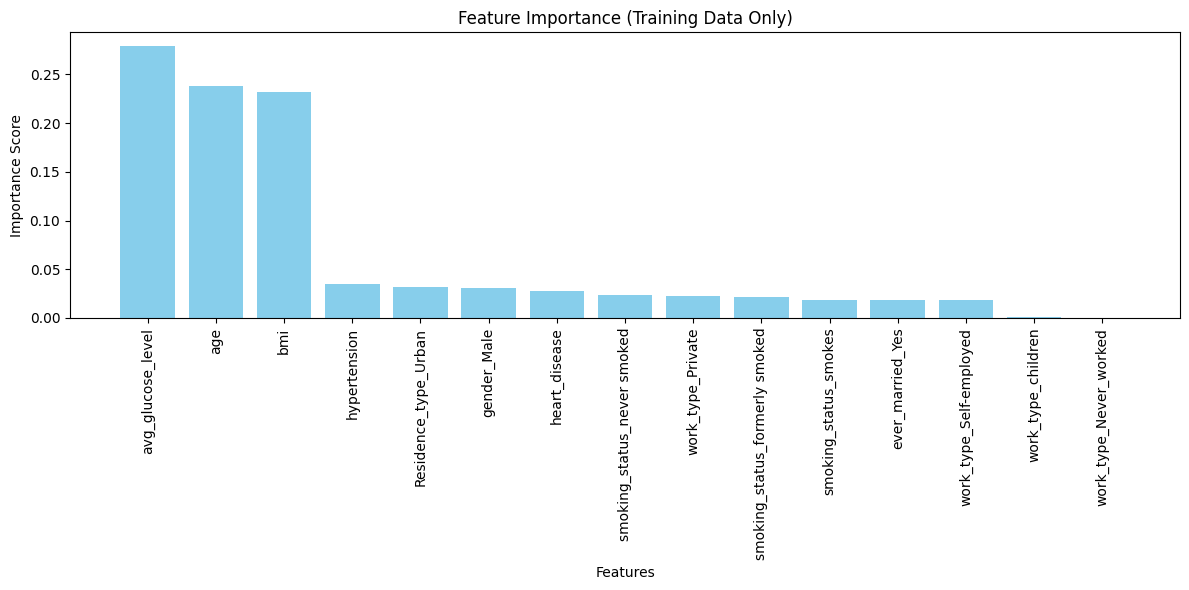

In [85]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Drop irrelevant columns and handle missing values
data = data.drop(columns=['id'])  # Remove ID column
data = data.dropna()  # Drop rows with missing values

# Define features (X) and target (y)
X = data.drop(columns=['stroke'])
y = data['stroke']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define preprocessing for numerical and categorical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encode categorical features
    ]
)

# Create a pipeline with preprocessing and Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Train the pipeline on training data
pipeline.fit(X_train, y_train)

# Extract feature importances from the trained Random Forest model
model = pipeline.named_steps['model']
processed_features = pipeline.named_steps['preprocessor'].transformers_[0][2].tolist() + \
                     pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out().tolist()
feature_importance = model.feature_importances_

# Visualize feature importance
indices = np.argsort(feature_importance)[::-1]  # Sort features by importance
plt.figure(figsize=(12, 6))
plt.bar(np.array(processed_features)[indices], feature_importance[indices], color='skyblue')
plt.xticks(rotation=90)
plt.title('Feature Importance (Training Data Only)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

18. BAR CHART Contribution to stroke

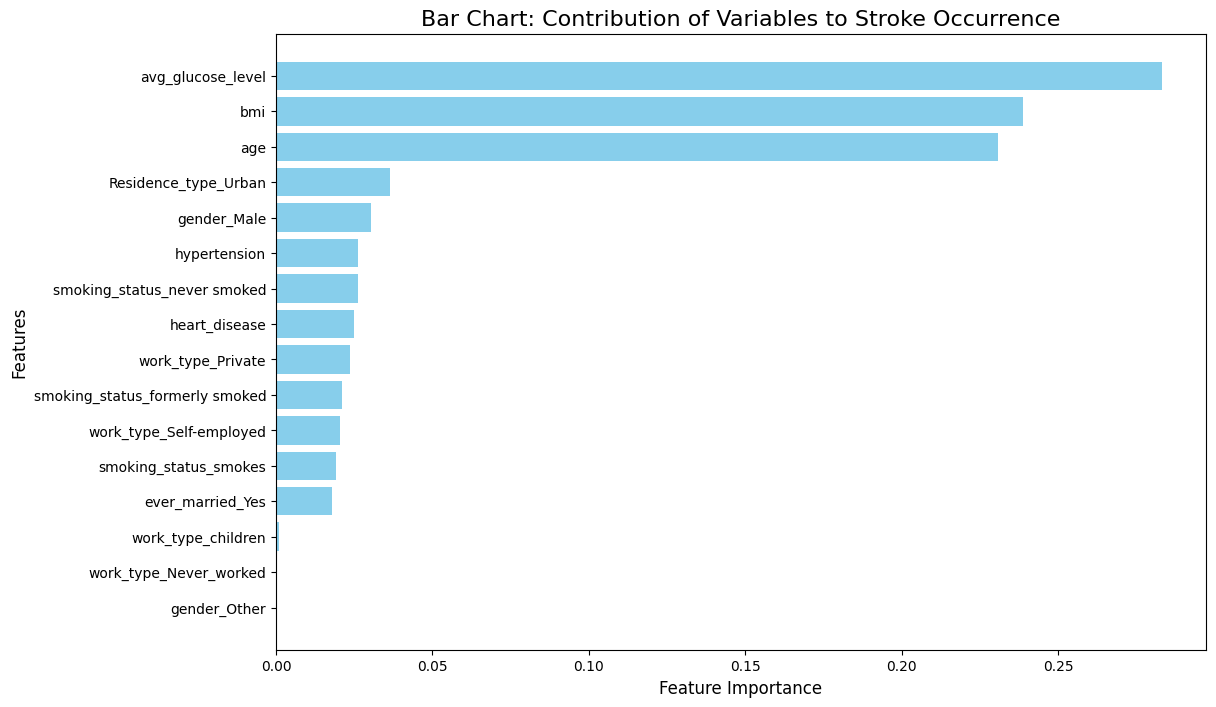

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = 'C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Specify target variable and features, excluding 'id' and other unnecessary variables
target = 'stroke'
irrelevant_features = ['id']  # Add other irrelevant features to this list if needed
features = [col for col in data.columns if col not in irrelevant_features and col != target]

# Preprocess the data (encoding categorical variables and handling missing values)
data_encoded = pd.get_dummies(data[features], drop_first=True)  # One-hot encode categorical variables
data_encoded[target] = data[target]  # Add target variable back to the dataframe
data_encoded = data_encoded.dropna()  # Remove rows with missing values

# Split data into features (X) and target (y)
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Train a Random Forest to compute feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_
contribution = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
contribution = contribution.sort_values(by='Importance', ascending=False)

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.barh(contribution['Feature'], contribution['Importance'], color='skyblue')
plt.title('Bar Chart: Contribution of Variables to Stroke Occurrence', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest contribution at the top
plt.show()

19. LOGISTIC REGGRESSION TABLE

In [27]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Specify target variable and features, removing irrelevant columns like 'id'
target = 'stroke'
irrelevant_features = ['id']  # Add other irrelevant features here
features = [col for col in data.columns if col not in irrelevant_features and col != target]

# Preprocess the data (encoding categorical variables and handling missing values)
data_encoded = pd.get_dummies(data[features], drop_first=True)  # One-hot encode categorical variables
data_encoded[target] = data[target]  # Add target variable back
data_encoded = data_encoded.dropna()  # Remove rows with missing values

# Split into features (X) and target (y)
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Standardize features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add constant to the features for statsmodels logistic regression
X_scaled = sm.add_constant(X_scaled)

# Perform Logistic Regression using statsmodels
logit_model = sm.Logit(y, X_scaled).fit()

# Get summary of the regression model
summary = logit_model.summary()

# Extract coefficients, Chi-squared values, and p-values
results = pd.DataFrame({
    'Feature': ['const'] + list(X.columns),
    'Coefficient': logit_model.params.values,
    'P-value': logit_model.pvalues.values,
    'Significant (P < 0.05)': logit_model.pvalues.values < 0.05
})

# Display the first 5 significant features with P-value < 0.05
significant_results = results[results['P-value'] < 0.05].head(5)

# Show the table
print(significant_results)

         Current function value: 0.138850
         Iterations: 35
                  Feature  Coefficient       P-value  Significant (P < 0.05)
1                     age     1.657199  5.343316e-31                    True
2            hypertension     0.151602  2.710626e-03                    True
4       avg_glucose_level     0.206621  3.243830e-04                    True
16  smoking_status_smokes     0.210481  2.701555e-02                    True


C:\Users\small\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


20. VIF LOLLIPOP PLOT

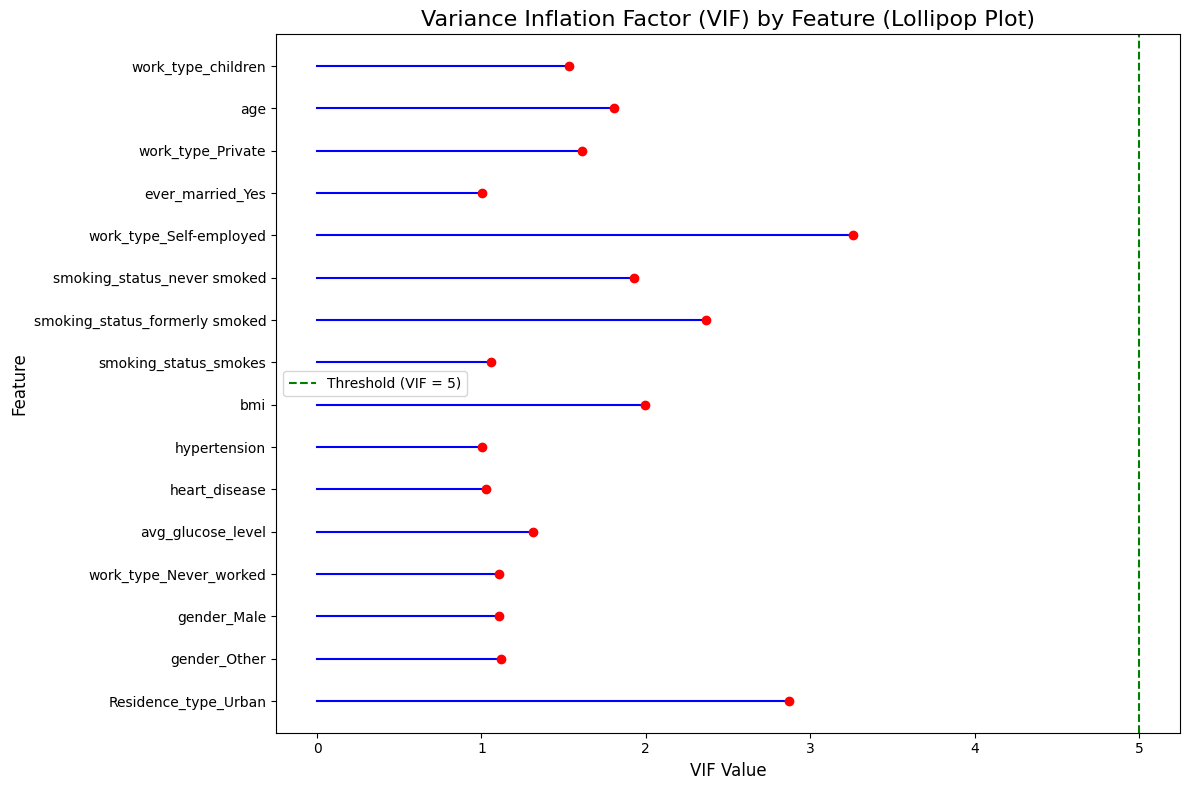

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Specify target variable and features, removing irrelevant columns like 'id'
target = 'stroke'
irrelevant_features = ['id']
features = [col for col in data.columns if col not in irrelevant_features and col != target]

# Preprocess the data (encoding categorical variables and handling missing values)
data_encoded = pd.get_dummies(data[features], drop_first=True)  # One-hot encode categorical variables
data_encoded = data_encoded.dropna()  # Remove rows with missing values

# Standardize features for VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Sort VIF values for better visualization
vif_data = vif_data.sort_values(by="VIF", ascending=True)

# Create a lollipop plot
plt.figure(figsize=(12, 8))
for i, row in vif_data.iterrows():
    plt.plot([0, row['VIF']], [i, i], 'blue')  # Stem line
    plt.plot(row['VIF'], i, 'ro')  # Marker

plt.yticks(range(len(vif_data['Feature'])), vif_data['Feature'])
plt.axvline(x=5, color='green', linestyle='--', label='Threshold (VIF = 5)')
plt.title('Variance Inflation Factor (VIF) by Feature (Lollipop Plot)', fontsize=16)
plt.xlabel('VIF Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

21. PRINCIPAL COMPONENT ANALYSIS

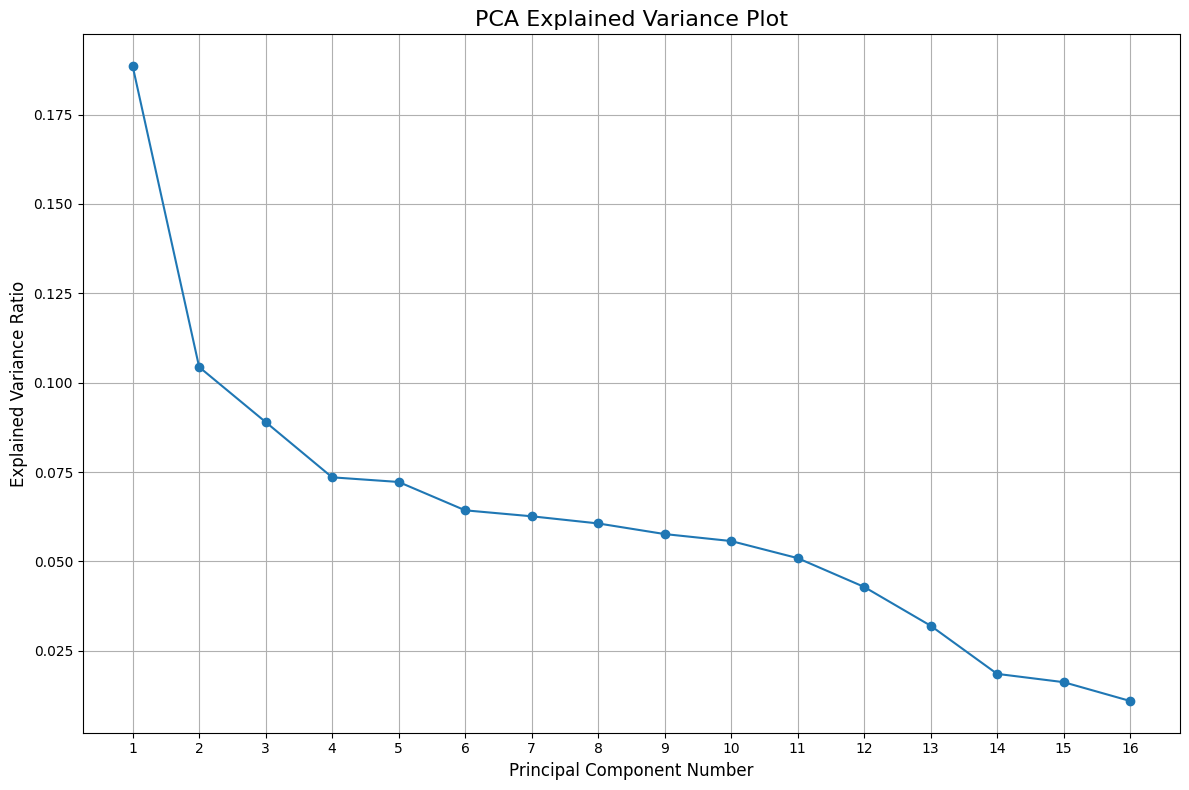

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/small/OneDrive/Documents/GitHub/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Specify target variable and features, removing irrelevant columns like 'id'
target = 'stroke'
irrelevant_features = ['id']
features = [col for col in data.columns if col not in irrelevant_features and col != target]

# Preprocess the data (encoding categorical variables and handling missing values)
data_encoded = pd.get_dummies(data[features], drop_first=True)  # One-hot encode categorical variables
data_encoded = data_encoded.dropna()  # Remove rows with missing values

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(12, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('PCA Explained Variance Plot', fontsize=16)
plt.xlabel('Principal Component Number', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()